# Plot S4 vs time in function of: frequency and constelation

In [51]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt

## 1) Import scintilacion files (.s4)  

In [52]:
directorio = "/home/luis/Desktop/Proyects_Files/LISN/GPSs/Tareas/Graficas_cintilaciones/input_data/"
df1 = pd.read_csv(directorio + "ljic_200806.s4", header=None, sep="\t")
df1.head(3)

,0,1,2,3,4,5,6,7,8,9,...,810,811,812,813,814,815,816,817,818,819
0,20,219,4560,33,G10,3.0,26.0,0.097,0.082,0.089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,219,4620,33,G10,3.0,26.0,0.108,0.079,0.089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,219,4680,33,G10,3.0,27.0,0.112,0.084,0.098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Columns: 820 entries, 0 to 819
dtypes: float64(499), int64(4), object(317)
memory usage: 96.2+ KB


## 2. Process that dataframe

In [54]:
# Eliminacion de ciertas columnas
for i in df1.columns:
    if i>3:
        m = (i-4)%24
        if m == 1: del df1[i]
        elif m == 2: del df1[i]
        elif m >= 9: del df1[i]

#df1.head()
df1.head()

,0,1,2,3,4,7,8,9,10,11,...,778,779,780,796,799,800,801,802,803,804
0,20,219,4560,33,G10,0.097,0.082,0.089,0.082,0.060,...,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,219,4620,33,G10,0.108,0.079,0.089,0.081,0.060,...,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,219,4680,33,G10,0.112,0.084,0.098,0.084,0.061,...,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,219,4740,33,G10,0.102,0.082,0.091,0.085,0.059,...,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,219,4800,33,G10,0.110,0.078,0.105,0.083,0.068,...,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Columns: 242 entries, 0 to 804
dtypes: float64(124), int64(4), object(114)
memory usage: 28.5+ KB


In [56]:
df1.columns = np.arange(len(df1.columns)) # Rename the columns 
df1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
0,20,219,4560,33,G10,0.097,0.082,0.089,0.082,0.06,...,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,219,4620,33,G10,0.108,0.079,0.089,0.081,0.06,...,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Creacion de un nuevo dataframe
df2 = pd.DataFrame(columns=range(10))

# Se llenan el resto de valores
T = 7 # Period of dataset
for i in range(len(df1)):
    for h in range(df1.iloc[i,3]): # that cell contains the number of measurements 
        m = df1.iloc[i,[0,1,2,4+T*h,5+T*h,6+T*h,7+T*h,8+T*h,9+T*h,10+T*h]]
        m.index = range(len(m))
        df2 = df2.append(m)

df2.index = range(len(df2))
df2.head()

,0,1,2,3,4,5,6,7,8,9
0,20,219,4560,G10,0.097,0.082,0.089,0.082,0.06,0.058
1,20,219,4560,G12,0.147,0.094,0.196,0.196,nan,nan
2,20,219,4560,G18,0.043,0.036,0.067,0.033,0.024,0.02
3,20,219,4560,G20,0.040,0.044,nan,nan,nan,nan
4,20,219,4560,G21,0.045,0.051,nan,nan,nan,nan


In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       497 non-null    object 
 1   1       497 non-null    object 
 2   2       497 non-null    object 
 3   3       497 non-null    object 
 4   4       497 non-null    float64
 5   5       497 non-null    float64
 6   6       497 non-null    object 
 7   7       497 non-null    object 
 8   8       497 non-null    object 
 9   9       497 non-null    object 
dtypes: float64(2), object(8)
memory usage: 39.0+ KB


In [59]:
# Change type object to double 
for i in range(3):
    df2[i] = df2[i].astype("int")

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       497 non-null    int64  
 1   1       497 non-null    int64  
 2   2       497 non-null    int64  
 3   3       497 non-null    object 
 4   4       497 non-null    float64
 5   5       497 non-null    float64
 6   6       497 non-null    object 
 7   7       497 non-null    object 
 8   8       497 non-null    object 
 9   9       497 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 39.0+ KB


In [61]:
# Change data type to str
for i in range(6):
    df2[4+i] = df2[4+i].astype("str").str.strip().astype("float")
df2.head()

,0,1,2,3,4,5,6,7,8,9
0,20,219,4560,G10,0.097,0.082,0.089,0.082,0.060,0.058
1,20,219,4560,G12,0.147,0.094,0.196,0.196,NaN,NaN
2,20,219,4560,G18,0.043,0.036,0.067,0.033,0.024,0.020
3,20,219,4560,G20,0.040,0.044,NaN,NaN,NaN,NaN
4,20,219,4560,G21,0.045,0.051,NaN,NaN,NaN,NaN


In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       497 non-null    int64  
 1   1       497 non-null    int64  
 2   2       497 non-null    int64  
 3   3       497 non-null    object 
 4   4       497 non-null    float64
 5   5       497 non-null    float64
 6   6       338 non-null    float64
 7   7       338 non-null    float64
 8   8       189 non-null    float64
 9   9       189 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 39.0+ KB


In [63]:
# Rename columns 
df2.columns = ["YY", "DOY", "SOD", "PRN", "S4_sig1", "S4_sig1_corr", "S4_sig2", "S4_sig2_corr", "S4_sig3", "S4_sig3_corr"]
df2.head()

,YY,DOY,SOD,PRN,S4_sig1,S4_sig1_corr,S4_sig2,S4_sig2_corr,S4_sig3,S4_sig3_corr
0,20,219,4560,G10,0.097,0.082,0.089,0.082,0.060,0.058
1,20,219,4560,G12,0.147,0.094,0.196,0.196,NaN,NaN
2,20,219,4560,G18,0.043,0.036,0.067,0.033,0.024,0.020
3,20,219,4560,G20,0.040,0.044,NaN,NaN,NaN,NaN
4,20,219,4560,G21,0.045,0.051,NaN,NaN,NaN,NaN


In [65]:
# Calculate the corrected S4
def get_correctedS4(row):
    s4 = row[0]
    correction= row[1]
    
    # Treat nan numbers 
    if pd.isnull(s4) or pd.isnull(correction):
        return np.nan
    else:
        # Calculate the corrected S4
        x = s4**2-correction**2
        if x>0:
            return x**0.5
        else:
            return 0    

for i in range(3):        
    df2[f"S4_sig{i+1}"] = df2[[f"S4_sig{i+1}",f"S4_sig{i+1}_corr"]].apply(get_correctedS4, axis=1)
df2.head()

,YY,DOY,SOD,PRN,S4_sig1,S4_sig1_corr,S4_sig2,S4_sig2_corr,S4_sig3,S4_sig3_corr
0,20,219,4560,G10,0.051817,0.082,0.034598,0.082,0.015362,0.058
1,20,219,4560,G12,0.113018,0.094,0.000000,0.196,NaN,NaN
2,20,219,4560,G18,0.023516,0.036,0.058310,0.033,0.013266,0.020
3,20,219,4560,G20,0.000000,0.044,NaN,NaN,NaN,NaN
4,20,219,4560,G21,0.000000,0.051,NaN,NaN,NaN,NaN


In [66]:
# Delete some columns
del df2["S4_sig1_corr"]
del df2["S4_sig2_corr"]
del df2["S4_sig3_corr"]
df2.head()

,YY,DOY,SOD,PRN,S4_sig1,S4_sig2,S4_sig3
0,20,219,4560,G10,0.051817,0.034598,0.015362
1,20,219,4560,G12,0.113018,0.000000,NaN
2,20,219,4560,G18,0.023516,0.058310,0.013266
3,20,219,4560,G20,0.000000,NaN,NaN
4,20,219,4560,G21,0.000000,NaN,NaN


In [67]:
# Sort values by "PRN" and "SOD" 
df2 = df2.sort_values(["PRN","SOD"])

# Reindex in ascendent order 
df2.index = range(len(df2))

df2

,YY,DOY,SOD,PRN,S4_sig1,S4_sig2,S4_sig3
0,20,219,4560,C12,0.039243,0.035889,0.009644
1,20,219,4620,C12,0.071951,0.056223,0.019596
2,20,219,4680,C12,0.056214,0.065230,0.009747
3,20,219,4740,C12,0.044306,0.055182,0.000000
4,20,219,4800,C12,0.049315,0.058129,0.000000
...,...,...,...,...,...,...,...
492,20,219,5160,S38,0.008888,0.000000,NaN
493,20,219,5220,S38,0.008775,0.006856,NaN
494,20,219,5280,S38,0.020372,0.006856,NaN
495,20,219,5340,S38,0.022181,0.000000,NaN


In [68]:
# Convert to datetime data type 
def change2datetime(row):
    yy = int(row[0])
    doy = int(row[1])
    sod = int(row[2])
    
    if sod < 0: 
        doy = doy -1
        sod = 60*60*24+sod      
    
    cdate = str(yy)+"-"+str(doy)+"-"+str(datetime.timedelta(seconds=sod))
    fecha = datetime.datetime.strptime(cdate, "%y-%j-%X")
    
    return fecha  

# Convert and assign
m = df2.apply(change2datetime, axis=1)

# Create the new column
df2.insert(0,column="DateTime",value=0)
df2["DateTime"] = m

# Delete some columns 
del df2["YY"]
del df2["DOY"]
del df2["SOD"]

df2

,DateTime,PRN,S4_sig1,S4_sig2,S4_sig3
0,2020-08-06 01:16:00,C12,0.039243,0.035889,0.009644
1,2020-08-06 01:17:00,C12,0.071951,0.056223,0.019596
2,2020-08-06 01:18:00,C12,0.056214,0.065230,0.009747
3,2020-08-06 01:19:00,C12,0.044306,0.055182,0.000000
4,2020-08-06 01:20:00,C12,0.049315,0.058129,0.000000
...,...,...,...,...,...
492,2020-08-06 01:26:00,S38,0.008888,0.000000,NaN
493,2020-08-06 01:27:00,S38,0.008775,0.006856,NaN
494,2020-08-06 01:28:00,S38,0.020372,0.006856,NaN
495,2020-08-06 01:29:00,S38,0.022181,0.000000,NaN


In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  497 non-null    datetime64[ns]
 1   PRN       497 non-null    object        
 2   S4_sig1   497 non-null    float64       
 3   S4_sig2   338 non-null    float64       
 4   S4_sig3   189 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 19.5+ KB


In [70]:
df2.set_index("DateTime", inplace=True)
df2.head()

,PRN,S4_sig1,S4_sig2,S4_sig3
DateTime,,,,
2020-08-06 01:16:00,C12,0.039243,0.035889,0.009644
2020-08-06 01:17:00,C12,0.071951,0.056223,0.019596
2020-08-06 01:18:00,C12,0.056214,0.065230,0.009747
2020-08-06 01:19:00,C12,0.044306,0.055182,0.000000
2020-08-06 01:20:00,C12,0.049315,0.058129,0.000000


Congratulations! The dataframe is ready to plot (y)

## 3. Plot for each frequency and constellation

In [71]:
# Identify the available PRNs
prns = df2["PRN"].str[0].unique() # extract the first character of each cell 
prns

array(['C', 'E', 'G', 'R', 'S'], dtype=object)

In [72]:
# Get current UTC date
fecha = dt.datetime.utcnow()
fecha = fecha.strftime("%Y/%m/%d")
fecha

'2020/11/20'

In [73]:
# Get the name for a given PRN code
def get_prn_name(prn_code):
    if prn_code == 'G': return 'GPS'
    elif prn_code == 'R': return 'GLONASS'
    elif prn_code == 'E': return 'GALILEO'
    elif prn_code == 'S': return 'SBAS'
    elif prn_code == 'C': return 'BEIDOU'
    elif prn_code == 'J': return 'QZSS'
    elif prn_code == 'I': return 'IRNSS'
    else:
        return 'Incorrect PRN code!'

In [74]:
# Get the frequency name for a given PRN code and Freq code
def get_sig_name(prn, sig):
    if sig == 1:
        if prn == 'G' or prn == 'R' or prn == 'S' or prn == 'J':
            return 'L1CA'
        elif prn == 'E':
            return 'L1BC'
        elif prn == 'C':
            return 'B1'
        elif prn == 'I':
            return 'L5'
        else: 
            return "Insert a right code!"
    elif sig == 2:
        if prn == 'G' or prn == 'R' or prn == 'J':
            return 'L2C'
        elif prn == 'E':
            return 'E5a'
        elif prn == 'C':
            return 'B2'
        elif prn == 'S':
            return 'L5'
        else: 
            return "Insert a right code!"
    elif sig == 3:
        if prn == 'G' or prn == 'J':
            return 'L5'
        elif prn == 'E':
            return 'E5b'
        elif prn == 'C':
            return 'B3'
        else: 
            return "Insert a right code!"
    else:
        "Insert a right code!"

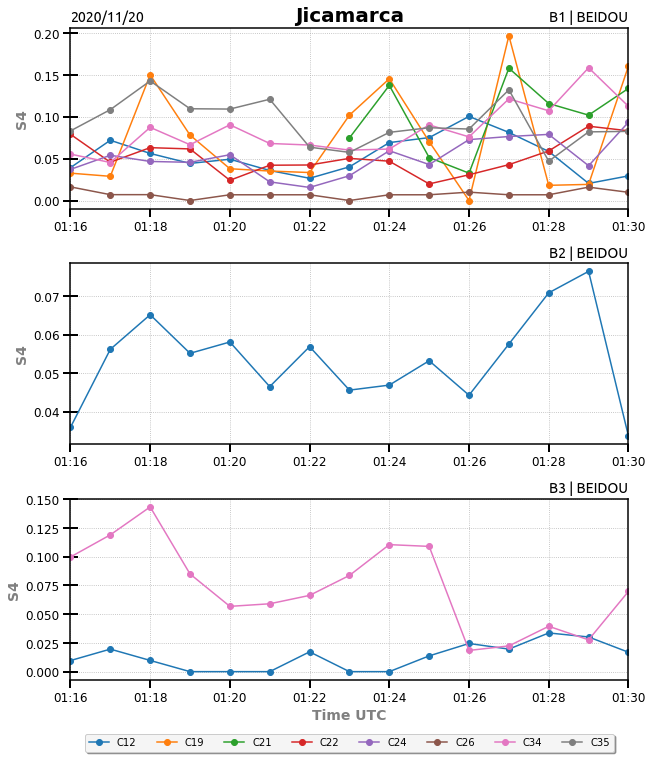

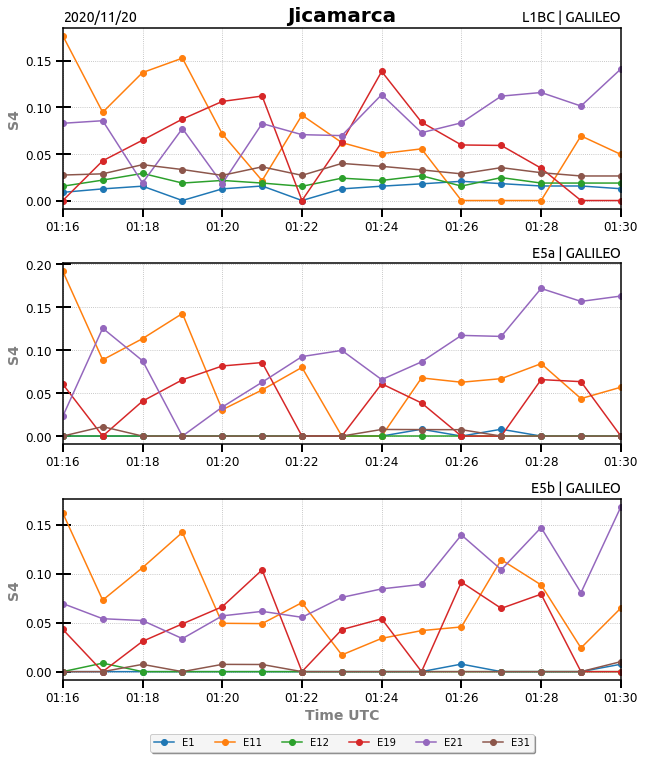

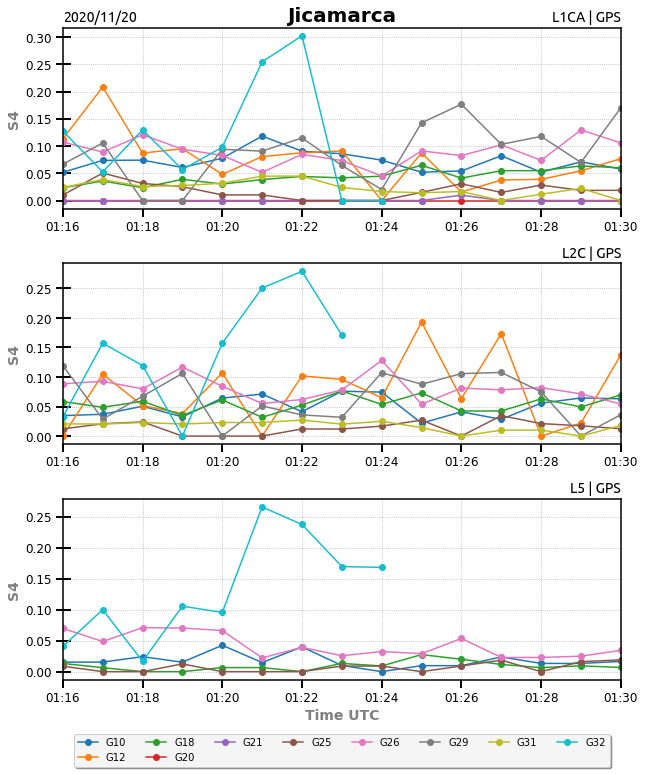

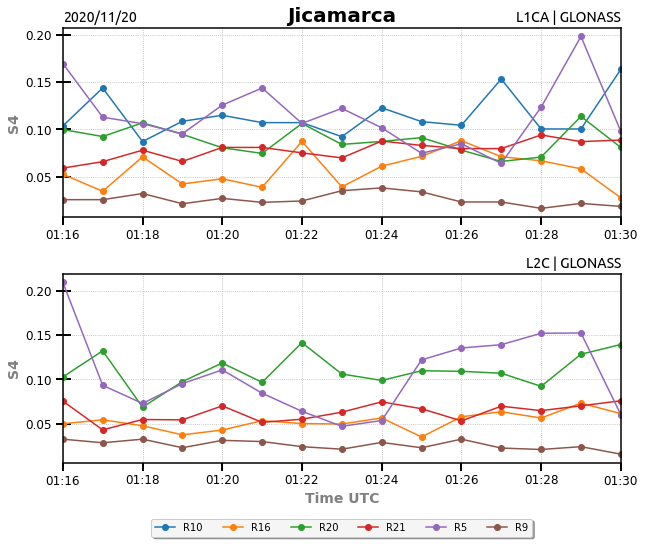

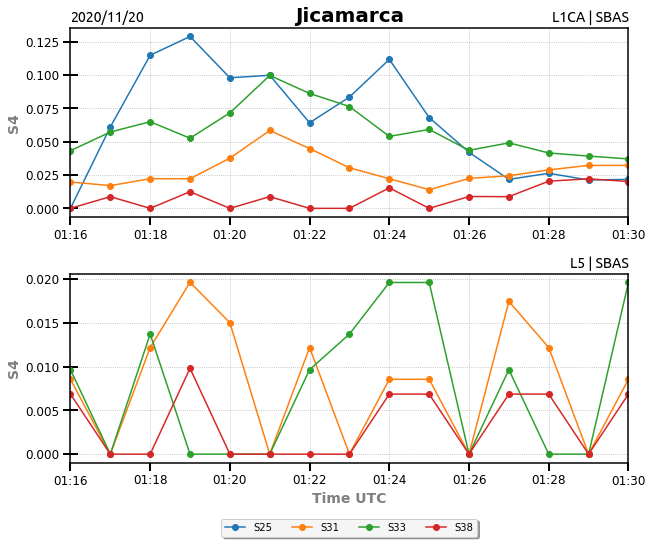

In [110]:
# Plot for each PRN and freq code
#
for prn in prns:
    mask = df2["PRN"].str.contains(prn)
    df3 = df2[mask]
    
    # Check no null columns 
    sig_n = df3.columns[1:] # Extract only the columns which have freq info
    n_subplots = 0
    for sig_i in sig_n:
        if df3[sig_i].isna().sum() < len(df3):
            n_subplots += 1
            
    # Plot for each PRN
    fig,ax = plt.subplots(n_subplots, figsize=(10,4*n_subplots))#, gridspec_kw={'width_ratios': [3, 1]})
    for i in range(len(ax)):
        sig = i+1 # frequency 
        first = 0 # first graph 
        last = len(ax) - 1 # last graph
        
        df3.groupby("PRN")["S4_sig"+str(sig)].plot(ax=ax[i], style='o-')

        if i == first:
            ax[i].set_title("Jicamarca", fontsize=20, fontweight='bold')
            ax[i].set_title(fecha, loc="left", fontsize=14, style='normal', name='Ubuntu')

        #ax[i].set_title(freq[i] + f" | {get_name_prn(prn)}", loc="right", fontsize=14, name = 'Ubuntu')
        ax[i].set_title(get_sig_name(prn, sig) + f" | {get_prn_name(prn)}", loc="right", fontsize=14, name = 'Ubuntu')
        ax[i].set_ylabel("S4", fontsize=14, weight='bold', color='gray')
        #
        if i == last:
            ax[i].set_xlabel("Time UTC", fontsize=14, weight='bold', color='gray')
        else:
            ax[i].set_xlabel("", fontsize=14, weight='bold', color='gray')    

        # Rectangle frame width 
        for axis in ['top','bottom','left','right']:
            ax[i].spines[axis].set_linewidth(1.5)

        # Ticks format 
        ax[i].xaxis.set_tick_params(width=2, length=8, which='both', direction='out')
        ax[i].yaxis.set_tick_params(width=2, length=15, direction='inout')
        ax[i].tick_params(axis='x', which='both', labelsize=12)
        ax[i].tick_params(axis='y', labelsize=12)

        # Grid and legend 
        ax[i].grid(which='both', axis='both', ls=':')
        if i == last:
            leg = ax[i].legend(loc='upper center', fancybox=True, shadow=True, bbox_to_anchor=(0.5, -0.27), ncol=8, facecolor='whitesmoke')

    plt.subplots_adjust(hspace=0.3)
    
    # Save figure as pdf
    file_path = "/home/luis/Desktop/Proyects_Files/LISN/GPSs/Tareas/Graficas_cintilaciones/Output_data/"
    file_name = f"s4_{get_prn_name(prn)}.pdf"
    
    plt.savefig(file_path + file_name, bbox_inches='tight')